## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  24.528525  1115.689131  0.836021   9.872959  1.329749
1  60.264349   556.357974  0.272624  10.235146  1.284605
2   9.529292  1721.731699  0.232134   9.158696  1.404337
3  62.158185  1452.761663  0.763752   2.926928  1.336139
4  56.091464  1521.851952  0.844549   1.551826  1.695277


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.09401 | train_mse: 4.49737 | train_mae: 1.63454 |  0:00:00s
epoch 1  | loss: 0.89781 | train_mse: 3.85107 | train_mae: 1.52164 |  0:00:00s
epoch 2  | loss: 0.76269 | train_mse: 2.55925 | train_mae: 1.23415 |  0:00:00s


epoch 3  | loss: 0.7089  | train_mse: 1.32387 | train_mae: 0.86718 |  0:00:00s
epoch 4  | loss: 0.54668 | train_mse: 1.21142 | train_mae: 0.82041 |  0:00:00s
epoch 5  | loss: 0.61336 | train_mse: 2.24432 | train_mae: 1.05685 |  0:00:00s


epoch 6  | loss: 0.54587 | train_mse: 2.08909 | train_mae: 1.01119 |  0:00:00s
epoch 7  | loss: 0.42569 | train_mse: 1.51847 | train_mae: 0.90133 |  0:00:00s
epoch 8  | loss: 0.31922 | train_mse: 1.01915 | train_mae: 0.68137 |  0:00:00s


epoch 9  | loss: 0.39837 | train_mse: 0.83208 | train_mae: 0.62251 |  0:00:00s
epoch 10 | loss: 0.32569 | train_mse: 0.64541 | train_mae: 0.53579 |  0:00:00s
epoch 11 | loss: 0.48234 | train_mse: 0.72525 | train_mae: 0.54596 |  0:00:01s


epoch 12 | loss: 0.41521 | train_mse: 0.66763 | train_mae: 0.54976 |  0:00:01s
epoch 13 | loss: 0.3764  | train_mse: 0.78837 | train_mae: 0.56789 |  0:00:01s
epoch 14 | loss: 0.44775 | train_mse: 0.90127 | train_mae: 0.6     |  0:00:01s


epoch 15 | loss: 0.26728 | train_mse: 1.23622 | train_mae: 0.68834 |  0:00:01s
epoch 16 | loss: 0.41326 | train_mse: 1.65665 | train_mae: 0.80103 |  0:00:01s
epoch 17 | loss: 0.35555 | train_mse: 1.84349 | train_mae: 0.83544 |  0:00:01s


epoch 18 | loss: 0.48136 | train_mse: 1.12635 | train_mae: 0.69176 |  0:00:01s
epoch 19 | loss: 0.39553 | train_mse: 0.70089 | train_mae: 0.52493 |  0:00:01s
epoch 20 | loss: 0.19815 | train_mse: 0.63879 | train_mae: 0.51489 |  0:00:01s


epoch 21 | loss: 0.34085 | train_mse: 0.45035 | train_mae: 0.46789 |  0:00:01s
epoch 22 | loss: 0.36052 | train_mse: 0.27196 | train_mae: 0.37323 |  0:00:01s
epoch 23 | loss: 0.39876 | train_mse: 0.26624 | train_mae: 0.37294 |  0:00:01s


epoch 24 | loss: 0.24442 | train_mse: 0.30917 | train_mae: 0.40198 |  0:00:02s
epoch 25 | loss: 0.34687 | train_mse: 0.35439 | train_mae: 0.44953 |  0:00:02s
epoch 26 | loss: 0.56043 | train_mse: 0.27918 | train_mae: 0.37785 |  0:00:02s
epoch 27 | loss: 0.2263  | train_mse: 0.30889 | train_mae: 0.37274 |  0:00:02s


epoch 28 | loss: 0.2903  | train_mse: 0.31404 | train_mae: 0.36885 |  0:00:02s
epoch 29 | loss: 0.32865 | train_mse: 0.25883 | train_mae: 0.34742 |  0:00:02s
epoch 30 | loss: 0.17654 | train_mse: 0.25617 | train_mae: 0.33392 |  0:00:02s


epoch 31 | loss: 0.17251 | train_mse: 0.35157 | train_mae: 0.37155 |  0:00:02s
epoch 32 | loss: 0.35479 | train_mse: 0.4739  | train_mae: 0.42209 |  0:00:02s
epoch 33 | loss: 0.22363 | train_mse: 0.2547  | train_mae: 0.32353 |  0:00:02s


epoch 34 | loss: 0.28517 | train_mse: 0.19593 | train_mae: 0.31446 |  0:00:02s
epoch 35 | loss: 0.42557 | train_mse: 0.17767 | train_mae: 0.31612 |  0:00:02s
epoch 36 | loss: 0.24736 | train_mse: 0.18652 | train_mae: 0.28862 |  0:00:02s


epoch 37 | loss: 0.46872 | train_mse: 0.23742 | train_mae: 0.34227 |  0:00:02s
epoch 38 | loss: 0.31498 | train_mse: 0.30015 | train_mae: 0.39649 |  0:00:03s
epoch 39 | loss: 0.3552  | train_mse: 0.24144 | train_mae: 0.37514 |  0:00:03s
epoch 40 | loss: 0.27036 | train_mse: 0.2238  | train_mae: 0.329   |  0:00:03s


epoch 41 | loss: 0.54072 | train_mse: 0.3073  | train_mae: 0.36507 |  0:00:03s
epoch 42 | loss: 0.25205 | train_mse: 0.3704  | train_mae: 0.40433 |  0:00:03s
epoch 43 | loss: 0.12497 | train_mse: 0.24857 | train_mae: 0.34056 |  0:00:03s


epoch 44 | loss: 0.61687 | train_mse: 0.15453 | train_mae: 0.28069 |  0:00:03s
epoch 45 | loss: 0.39242 | train_mse: 0.1742  | train_mae: 0.29851 |  0:00:03s
epoch 46 | loss: 0.27112 | train_mse: 0.19577 | train_mae: 0.31293 |  0:00:03s


epoch 47 | loss: 0.51771 | train_mse: 0.1778  | train_mae: 0.31158 |  0:00:03s
epoch 48 | loss: 0.46801 | train_mse: 0.30342 | train_mae: 0.33643 |  0:00:03s
epoch 49 | loss: 0.40533 | train_mse: 0.57081 | train_mae: 0.42325 |  0:00:03s
epoch 50 | loss: 0.28556 | train_mse: 0.44132 | train_mae: 0.37892 |  0:00:03s


epoch 51 | loss: 0.47484 | train_mse: 0.26475 | train_mae: 0.30639 |  0:00:03s
epoch 52 | loss: 0.49524 | train_mse: 0.20233 | train_mae: 0.31189 |  0:00:04s
epoch 53 | loss: 0.68414 | train_mse: 0.21068 | train_mae: 0.33703 |  0:00:04s


epoch 54 | loss: 0.48653 | train_mse: 0.21511 | train_mae: 0.3409  |  0:00:04s
epoch 55 | loss: 0.40915 | train_mse: 0.20683 | train_mae: 0.32756 |  0:00:04s
epoch 56 | loss: 0.32979 | train_mse: 0.20433 | train_mae: 0.31997 |  0:00:04s
epoch 57 | loss: 0.52107 | train_mse: 0.21454 | train_mae: 0.31583 |  0:00:04s


epoch 58 | loss: 0.44959 | train_mse: 0.21171 | train_mae: 0.31782 |  0:00:04s
epoch 59 | loss: 0.38499 | train_mse: 0.20196 | train_mae: 0.30836 |  0:00:04s
epoch 60 | loss: 0.30951 | train_mse: 0.19669 | train_mae: 0.30228 |  0:00:04s


epoch 61 | loss: 0.36836 | train_mse: 0.19112 | train_mae: 0.29715 |  0:00:04s
epoch 62 | loss: 0.43676 | train_mse: 0.18996 | train_mae: 0.29925 |  0:00:04s
epoch 63 | loss: 0.23947 | train_mse: 0.18255 | train_mae: 0.2839  |  0:00:04s
epoch 64 | loss: 0.23447 | train_mse: 0.1716  | train_mae: 0.27634 |  0:00:04s


epoch 65 | loss: 0.38917 | train_mse: 0.19021 | train_mae: 0.3062  |  0:00:04s
epoch 66 | loss: 0.30887 | train_mse: 0.21215 | train_mae: 0.32476 |  0:00:04s
epoch 67 | loss: 0.23742 | train_mse: 0.22905 | train_mae: 0.33836 |  0:00:05s
epoch 68 | loss: 0.41974 | train_mse: 0.17632 | train_mae: 0.29083 |  0:00:05s


epoch 69 | loss: 0.16071 | train_mse: 0.16805 | train_mae: 0.30185 |  0:00:05s
epoch 70 | loss: 0.23413 | train_mse: 0.19176 | train_mae: 0.30395 |  0:00:05s
epoch 71 | loss: 0.26385 | train_mse: 0.17542 | train_mae: 0.28732 |  0:00:05s
epoch 72 | loss: 0.47921 | train_mse: 0.18777 | train_mae: 0.30137 |  0:00:05s


epoch 73 | loss: 0.34021 | train_mse: 0.23986 | train_mae: 0.32712 |  0:00:05s
epoch 74 | loss: 0.26408 | train_mse: 0.19786 | train_mae: 0.3155  |  0:00:05s
epoch 75 | loss: 0.47378 | train_mse: 0.18396 | train_mae: 0.28844 |  0:00:05s


epoch 76 | loss: 0.64847 | train_mse: 0.19809 | train_mae: 0.28829 |  0:00:05s
epoch 77 | loss: 0.32987 | train_mse: 0.19737 | train_mae: 0.27094 |  0:00:05s
epoch 78 | loss: 0.5341  | train_mse: 0.29653 | train_mae: 0.31685 |  0:00:05s


epoch 79 | loss: 0.52047 | train_mse: 0.24526 | train_mae: 0.29504 |  0:00:05s
epoch 80 | loss: 0.18316 | train_mse: 0.24902 | train_mae: 0.31086 |  0:00:05s
epoch 81 | loss: 0.47449 | train_mse: 0.18452 | train_mae: 0.27916 |  0:00:05s


epoch 82 | loss: 0.51076 | train_mse: 0.19128 | train_mae: 0.28109 |  0:00:06s
epoch 83 | loss: 0.14397 | train_mse: 0.15973 | train_mae: 0.27146 |  0:00:06s
epoch 84 | loss: 0.28449 | train_mse: 0.14782 | train_mae: 0.26943 |  0:00:06s
epoch 85 | loss: 0.38505 | train_mse: 0.15593 | train_mae: 0.27972 |  0:00:06s


epoch 86 | loss: 0.20137 | train_mse: 0.16509 | train_mae: 0.29871 |  0:00:06s
epoch 87 | loss: 0.31043 | train_mse: 0.199   | train_mae: 0.32412 |  0:00:06s


epoch 88 | loss: 0.19521 | train_mse: 0.33712 | train_mae: 0.3556  |  0:00:06s
epoch 89 | loss: 0.49384 | train_mse: 0.20074 | train_mae: 0.30219 |  0:00:06s
epoch 90 | loss: 0.45306 | train_mse: 0.17379 | train_mae: 0.30413 |  0:00:06s


epoch 91 | loss: 0.25298 | train_mse: 0.16133 | train_mae: 0.29525 |  0:00:06s
epoch 92 | loss: 0.15166 | train_mse: 0.20883 | train_mae: 0.2931  |  0:00:06s
epoch 93 | loss: 0.37567 | train_mse: 0.32205 | train_mae: 0.32927 |  0:00:06s


epoch 94 | loss: 0.70384 | train_mse: 0.38281 | train_mae: 0.34227 |  0:00:07s
epoch 95 | loss: 0.33648 | train_mse: 0.33003 | train_mae: 0.34544 |  0:00:07s
epoch 96 | loss: 0.22587 | train_mse: 0.22893 | train_mae: 0.35603 |  0:00:07s


epoch 97 | loss: 0.29071 | train_mse: 0.16523 | train_mae: 0.30769 |  0:00:07s
epoch 98 | loss: 0.17732 | train_mse: 0.17378 | train_mae: 0.29511 |  0:00:07s
epoch 99 | loss: 0.37906 | train_mse: 0.29248 | train_mae: 0.29316 |  0:00:07s
epoch 100| loss: 0.28262 | train_mse: 0.25616 | train_mae: 0.29652 |  0:00:07s


epoch 101| loss: 0.26725 | train_mse: 0.14757 | train_mae: 0.27568 |  0:00:07s
epoch 102| loss: 0.19471 | train_mse: 0.21195 | train_mae: 0.29059 |  0:00:07s
epoch 103| loss: 0.37238 | train_mse: 0.37167 | train_mae: 0.32287 |  0:00:07s
epoch 104| loss: 0.35234 | train_mse: 0.21954 | train_mae: 0.28432 |  0:00:07s
epoch 105| loss: 0.28715 | train_mse: 0.18823 | train_mae: 0.28623 |  0:00:07s


epoch 106| loss: 0.46068 | train_mse: 0.23477 | train_mae: 0.33396 |  0:00:07s
epoch 107| loss: 0.59314 | train_mse: 0.33993 | train_mae: 0.3947  |  0:00:07s
epoch 108| loss: 0.3106  | train_mse: 0.23754 | train_mae: 0.34747 |  0:00:08s


epoch 109| loss: 0.36274 | train_mse: 0.16632 | train_mae: 0.28128 |  0:00:08s
epoch 110| loss: 0.22113 | train_mse: 0.25103 | train_mae: 0.28531 |  0:00:08s
epoch 111| loss: 0.19946 | train_mse: 0.27659 | train_mae: 0.29404 |  0:00:08s
epoch 112| loss: 0.29858 | train_mse: 0.16991 | train_mae: 0.24933 |  0:00:08s


epoch 113| loss: 0.45224 | train_mse: 0.17592 | train_mae: 0.28826 |  0:00:08s
epoch 114| loss: 0.3766  | train_mse: 0.15484 | train_mae: 0.28263 |  0:00:08s
epoch 115| loss: 0.32996 | train_mse: 0.12812 | train_mae: 0.25284 |  0:00:08s


epoch 116| loss: 0.45456 | train_mse: 0.25169 | train_mae: 0.31419 |  0:00:08s
epoch 117| loss: 0.47733 | train_mse: 0.2602  | train_mae: 0.30821 |  0:00:08s
epoch 118| loss: 0.26385 | train_mse: 0.24186 | train_mae: 0.28192 |  0:00:08s
epoch 119| loss: 0.28374 | train_mse: 0.1343  | train_mae: 0.25061 |  0:00:08s


epoch 120| loss: 0.52589 | train_mse: 0.15875 | train_mae: 0.25839 |  0:00:08s
epoch 121| loss: 0.24503 | train_mse: 0.13126 | train_mae: 0.24157 |  0:00:08s
epoch 122| loss: 0.27909 | train_mse: 0.1338  | train_mae: 0.24934 |  0:00:08s
epoch 123| loss: 0.43393 | train_mse: 0.23932 | train_mae: 0.26795 |  0:00:09s


epoch 124| loss: 0.23984 | train_mse: 0.20849 | train_mae: 0.29047 |  0:00:09s
epoch 125| loss: 0.57307 | train_mse: 0.18867 | train_mae: 0.28692 |  0:00:09s
epoch 126| loss: 0.33363 | train_mse: 0.16906 | train_mae: 0.29974 |  0:00:09s
epoch 127| loss: 0.27195 | train_mse: 0.15868 | train_mae: 0.30946 |  0:00:09s


epoch 128| loss: 0.34156 | train_mse: 0.18032 | train_mae: 0.29654 |  0:00:09s
epoch 129| loss: 0.31742 | train_mse: 0.2067  | train_mae: 0.29006 |  0:00:09s
epoch 130| loss: 0.16109 | train_mse: 0.18464 | train_mae: 0.26787 |  0:00:09s
epoch 131| loss: 0.45358 | train_mse: 0.16256 | train_mae: 0.27443 |  0:00:09s


epoch 132| loss: 0.28357 | train_mse: 0.18602 | train_mae: 0.30617 |  0:00:09s
epoch 133| loss: 0.30658 | train_mse: 0.17759 | train_mae: 0.2993  |  0:00:09s
epoch 134| loss: 0.31178 | train_mse: 0.15646 | train_mae: 0.28024 |  0:00:09s
epoch 135| loss: 0.22209 | train_mse: 0.18389 | train_mae: 0.29666 |  0:00:09s


epoch 136| loss: 0.50526 | train_mse: 0.20351 | train_mae: 0.30895 |  0:00:09s
epoch 137| loss: 0.2467  | train_mse: 0.18391 | train_mae: 0.29983 |  0:00:09s
epoch 138| loss: 0.2649  | train_mse: 0.14949 | train_mae: 0.26331 |  0:00:10s


epoch 139| loss: 0.23393 | train_mse: 0.13223 | train_mae: 0.24281 |  0:00:10s
epoch 140| loss: 0.27223 | train_mse: 0.15793 | train_mae: 0.26913 |  0:00:10s
epoch 141| loss: 0.26679 | train_mse: 0.15139 | train_mae: 0.26013 |  0:00:10s
epoch 142| loss: 0.35428 | train_mse: 0.18221 | train_mae: 0.2446  |  0:00:10s


epoch 143| loss: 0.38453 | train_mse: 0.23226 | train_mae: 0.27341 |  0:00:10s
epoch 144| loss: 0.26436 | train_mse: 0.19304 | train_mae: 0.24958 |  0:00:10s
epoch 145| loss: 0.32879 | train_mse: 0.20155 | train_mae: 0.30073 |  0:00:10s


epoch 146| loss: 0.5586  | train_mse: 0.20562 | train_mae: 0.3089  |  0:00:10s
epoch 147| loss: 0.26233 | train_mse: 0.15998 | train_mae: 0.25923 |  0:00:10s
epoch 148| loss: 0.36375 | train_mse: 0.14611 | train_mae: 0.25217 |  0:00:10s
epoch 149| loss: 0.15925 | train_mse: 0.12771 | train_mae: 0.24078 |  0:00:10s


epoch 150| loss: 0.3249  | train_mse: 0.15925 | train_mae: 0.26722 |  0:00:10s
epoch 151| loss: 0.38722 | train_mse: 0.16726 | train_mae: 0.27006 |  0:00:10s
epoch 152| loss: 0.27766 | train_mse: 0.14322 | train_mae: 0.26058 |  0:00:10s
epoch 153| loss: 0.28897 | train_mse: 0.14175 | train_mae: 0.26613 |  0:00:11s


epoch 154| loss: 0.33443 | train_mse: 0.1402  | train_mae: 0.26418 |  0:00:11s
epoch 155| loss: 0.2677  | train_mse: 0.16653 | train_mae: 0.25794 |  0:00:11s
epoch 156| loss: 0.19498 | train_mse: 0.13854 | train_mae: 0.2549  |  0:00:11s
epoch 157| loss: 0.19195 | train_mse: 0.11513 | train_mae: 0.24165 |  0:00:11s


epoch 158| loss: 0.18014 | train_mse: 0.11897 | train_mae: 0.2524  |  0:00:11s
epoch 159| loss: 0.35689 | train_mse: 0.29798 | train_mae: 0.30032 |  0:00:11s
epoch 160| loss: 0.24597 | train_mse: 0.34815 | train_mae: 0.30174 |  0:00:11s
epoch 161| loss: 0.4044  | train_mse: 0.32355 | train_mae: 0.31234 |  0:00:11s


epoch 162| loss: 0.38804 | train_mse: 0.17882 | train_mae: 0.28664 |  0:00:11s
epoch 163| loss: 0.30129 | train_mse: 0.10858 | train_mae: 0.2404  |  0:00:11s
epoch 164| loss: 0.43314 | train_mse: 0.11745 | train_mae: 0.24255 |  0:00:11s
epoch 165| loss: 0.17762 | train_mse: 0.1066  | train_mae: 0.23951 |  0:00:11s


epoch 166| loss: 0.14747 | train_mse: 0.10454 | train_mae: 0.24591 |  0:00:11s
epoch 167| loss: 0.46799 | train_mse: 0.15809 | train_mae: 0.29695 |  0:00:11s
epoch 168| loss: 0.50825 | train_mse: 0.25001 | train_mae: 0.32878 |  0:00:12s
epoch 169| loss: 0.17744 | train_mse: 0.20424 | train_mae: 0.28334 |  0:00:12s


epoch 170| loss: 0.20971 | train_mse: 0.16111 | train_mae: 0.26925 |  0:00:12s
epoch 171| loss: 0.35146 | train_mse: 0.17575 | train_mae: 0.28961 |  0:00:12s
epoch 172| loss: 0.14543 | train_mse: 0.32563 | train_mae: 0.35002 |  0:00:12s
epoch 173| loss: 0.1507  | train_mse: 0.39595 | train_mae: 0.37973 |  0:00:12s


epoch 174| loss: 0.86167 | train_mse: 0.16769 | train_mae: 0.29131 |  0:00:12s
epoch 175| loss: 0.10384 | train_mse: 0.14606 | train_mae: 0.26774 |  0:00:12s
epoch 176| loss: 0.22643 | train_mse: 0.14182 | train_mae: 0.26023 |  0:00:12s


epoch 177| loss: 0.20018 | train_mse: 0.26365 | train_mae: 0.31019 |  0:00:12s
epoch 178| loss: 0.13302 | train_mse: 0.27002 | train_mae: 0.30931 |  0:00:12s
epoch 179| loss: 0.31258 | train_mse: 0.15704 | train_mae: 0.26223 |  0:00:12s
epoch 180| loss: 0.21106 | train_mse: 0.09954 | train_mae: 0.24131 |  0:00:12s


epoch 181| loss: 0.16958 | train_mse: 0.10116 | train_mae: 0.24629 |  0:00:12s
epoch 182| loss: 0.37046 | train_mse: 0.13353 | train_mae: 0.27075 |  0:00:12s
epoch 183| loss: 0.26963 | train_mse: 0.12164 | train_mae: 0.25793 |  0:00:13s
epoch 184| loss: 0.18312 | train_mse: 0.14798 | train_mae: 0.26053 |  0:00:13s


epoch 185| loss: 0.13079 | train_mse: 0.12677 | train_mae: 0.24796 |  0:00:13s
epoch 186| loss: 0.17404 | train_mse: 0.11318 | train_mae: 0.24648 |  0:00:13s
epoch 187| loss: 0.15559 | train_mse: 0.13086 | train_mae: 0.22261 |  0:00:13s
epoch 188| loss: 0.58433 | train_mse: 0.48663 | train_mae: 0.29452 |  0:00:13s


epoch 189| loss: 0.59263 | train_mse: 0.51507 | train_mae: 0.32114 |  0:00:13s
epoch 190| loss: 0.68938 | train_mse: 0.4729  | train_mae: 0.29719 |  0:00:13s
epoch 191| loss: 0.49698 | train_mse: 0.3823  | train_mae: 0.30111 |  0:00:13s


epoch 192| loss: 0.23718 | train_mse: 0.31502 | train_mae: 0.30024 |  0:00:13s
epoch 193| loss: 0.25571 | train_mse: 0.34982 | train_mae: 0.3211  |  0:00:13s
epoch 194| loss: 0.22284 | train_mse: 0.17724 | train_mae: 0.29015 |  0:00:13s
epoch 195| loss: 0.12263 | train_mse: 0.24714 | train_mae: 0.33495 |  0:00:13s


epoch 196| loss: 0.40568 | train_mse: 0.32309 | train_mae: 0.35647 |  0:00:13s
epoch 197| loss: 0.16511 | train_mse: 0.21173 | train_mae: 0.30859 |  0:00:13s
epoch 198| loss: 0.23514 | train_mse: 0.12595 | train_mae: 0.27158 |  0:00:14s
epoch 199| loss: 0.41604 | train_mse: 0.11544 | train_mae: 0.27199 |  0:00:14s


epoch 200| loss: 0.16991 | train_mse: 0.1617  | train_mae: 0.29457 |  0:00:14s
epoch 201| loss: 0.14713 | train_mse: 0.30395 | train_mae: 0.3194  |  0:00:14s
epoch 202| loss: 0.21982 | train_mse: 0.38525 | train_mae: 0.34779 |  0:00:14s
epoch 203| loss: 0.18823 | train_mse: 0.43649 | train_mae: 0.3598  |  0:00:14s


epoch 204| loss: 0.35446 | train_mse: 0.43318 | train_mae: 0.35372 |  0:00:14s
epoch 205| loss: 0.18778 | train_mse: 0.34739 | train_mae: 0.32192 |  0:00:14s
epoch 206| loss: 0.30012 | train_mse: 0.32627 | train_mae: 0.31911 |  0:00:14s


epoch 207| loss: 0.29392 | train_mse: 0.36194 | train_mae: 0.34784 |  0:00:14s
epoch 208| loss: 0.34287 | train_mse: 0.28496 | train_mae: 0.34522 |  0:00:14s
epoch 209| loss: 0.21975 | train_mse: 0.37158 | train_mae: 0.37644 |  0:00:14s


epoch 210| loss: 0.29817 | train_mse: 0.29001 | train_mae: 0.34442 |  0:00:14s
epoch 211| loss: 0.40934 | train_mse: 0.13809 | train_mae: 0.26259 |  0:00:15s


epoch 212| loss: 0.14273 | train_mse: 0.11453 | train_mae: 0.24844 |  0:00:15s
epoch 213| loss: 0.18473 | train_mse: 0.12641 | train_mae: 0.26304 |  0:00:15s


epoch 214| loss: 0.1946  | train_mse: 0.14208 | train_mae: 0.26685 |  0:00:15s
epoch 215| loss: 0.12089 | train_mse: 0.1491  | train_mae: 0.26537 |  0:00:15s


epoch 216| loss: 0.31809 | train_mse: 0.10967 | train_mae: 0.25478 |  0:00:15s
epoch 217| loss: 0.27435 | train_mse: 0.11196 | train_mae: 0.26019 |  0:00:15s
epoch 218| loss: 0.3415  | train_mse: 0.10761 | train_mae: 0.25015 |  0:00:15s


epoch 219| loss: 0.29056 | train_mse: 0.08986 | train_mae: 0.23078 |  0:00:16s
epoch 220| loss: 0.12547 | train_mse: 0.15426 | train_mae: 0.26536 |  0:00:16s
epoch 221| loss: 0.12011 | train_mse: 0.29144 | train_mae: 0.30993 |  0:00:16s


epoch 222| loss: 0.29326 | train_mse: 0.17915 | train_mae: 0.31445 |  0:00:16s
epoch 223| loss: 0.11012 | train_mse: 0.15392 | train_mae: 0.29344 |  0:00:16s
epoch 224| loss: 0.14941 | train_mse: 0.11211 | train_mae: 0.26064 |  0:00:16s


epoch 225| loss: 0.11947 | train_mse: 0.1206  | train_mae: 0.27236 |  0:00:16s


epoch 226| loss: 0.19338 | train_mse: 0.11774 | train_mae: 0.26897 |  0:00:16s
epoch 227| loss: 0.23218 | train_mse: 0.09443 | train_mae: 0.23804 |  0:00:16s
epoch 228| loss: 0.8525  | train_mse: 0.08755 | train_mae: 0.23083 |  0:00:16s


epoch 229| loss: 0.13353 | train_mse: 0.07011 | train_mae: 0.20322 |  0:00:16s
epoch 230| loss: 0.17665 | train_mse: 0.08164 | train_mae: 0.22408 |  0:00:17s
epoch 231| loss: 0.08062 | train_mse: 0.10074 | train_mae: 0.2287  |  0:00:17s
epoch 232| loss: 0.07307 | train_mse: 0.12614 | train_mae: 0.24759 |  0:00:17s


epoch 233| loss: 0.43004 | train_mse: 0.12383 | train_mae: 0.24725 |  0:00:17s
epoch 234| loss: 0.15152 | train_mse: 0.09873 | train_mae: 0.22165 |  0:00:17s
epoch 235| loss: 0.19966 | train_mse: 0.09323 | train_mae: 0.23292 |  0:00:17s
epoch 236| loss: 0.1788  | train_mse: 0.11085 | train_mae: 0.23675 |  0:00:17s


epoch 237| loss: 0.19487 | train_mse: 0.07257 | train_mae: 0.19861 |  0:00:17s
epoch 238| loss: 0.15408 | train_mse: 0.06373 | train_mae: 0.19525 |  0:00:17s
epoch 239| loss: 0.32968 | train_mse: 0.07412 | train_mae: 0.21173 |  0:00:17s


epoch 240| loss: 0.13325 | train_mse: 0.07785 | train_mae: 0.21553 |  0:00:17s
epoch 241| loss: 0.12952 | train_mse: 0.06846 | train_mae: 0.2007  |  0:00:17s
epoch 242| loss: 0.17492 | train_mse: 0.06113 | train_mae: 0.19522 |  0:00:17s
epoch 243| loss: 0.49991 | train_mse: 0.07479 | train_mae: 0.21703 |  0:00:17s


epoch 244| loss: 0.12345 | train_mse: 0.08236 | train_mae: 0.22571 |  0:00:17s
epoch 245| loss: 0.29071 | train_mse: 0.07789 | train_mae: 0.21067 |  0:00:17s
epoch 246| loss: 0.22399 | train_mse: 0.28829 | train_mae: 0.23786 |  0:00:18s
epoch 247| loss: 0.18385 | train_mse: 0.07635 | train_mae: 0.19538 |  0:00:18s


epoch 248| loss: 0.19485 | train_mse: 0.13042 | train_mae: 0.24691 |  0:00:18s
epoch 249| loss: 0.09728 | train_mse: 0.14088 | train_mae: 0.24946 |  0:00:18s
epoch 250| loss: 0.22954 | train_mse: 0.12045 | train_mae: 0.23691 |  0:00:18s
epoch 251| loss: 0.21135 | train_mse: 0.0843  | train_mae: 0.22492 |  0:00:18s


epoch 252| loss: 0.11955 | train_mse: 0.08379 | train_mae: 0.23306 |  0:00:18s
epoch 253| loss: 0.15389 | train_mse: 0.07478 | train_mae: 0.22005 |  0:00:18s
epoch 254| loss: 0.12118 | train_mse: 0.0626  | train_mae: 0.19776 |  0:00:18s


epoch 255| loss: 0.1378  | train_mse: 0.08652 | train_mae: 0.22194 |  0:00:18s
epoch 256| loss: 0.13707 | train_mse: 0.15975 | train_mae: 0.24815 |  0:00:18s
epoch 257| loss: 0.21847 | train_mse: 0.20845 | train_mae: 0.25584 |  0:00:18s


epoch 258| loss: 0.18816 | train_mse: 0.22195 | train_mae: 0.25463 |  0:00:18s
epoch 259| loss: 0.37435 | train_mse: 0.11136 | train_mae: 0.23594 |  0:00:19s
epoch 260| loss: 0.18323 | train_mse: 0.10866 | train_mae: 0.24199 |  0:00:19s
epoch 261| loss: 0.36853 | train_mse: 0.13728 | train_mae: 0.27308 |  0:00:19s


epoch 262| loss: 0.20916 | train_mse: 0.11086 | train_mae: 0.24669 |  0:00:19s
epoch 263| loss: 0.15729 | train_mse: 0.10869 | train_mae: 0.23203 |  0:00:19s
epoch 264| loss: 0.34978 | train_mse: 0.11031 | train_mae: 0.23487 |  0:00:19s
epoch 265| loss: 0.10271 | train_mse: 0.09249 | train_mae: 0.22146 |  0:00:19s


epoch 266| loss: 0.15147 | train_mse: 0.07173 | train_mae: 0.19532 |  0:00:19s
epoch 267| loss: 0.11059 | train_mse: 0.06446 | train_mae: 0.18681 |  0:00:19s
epoch 268| loss: 0.1328  | train_mse: 0.09677 | train_mae: 0.21512 |  0:00:19s


epoch 269| loss: 0.10819 | train_mse: 0.11089 | train_mae: 0.22628 |  0:00:19s
epoch 270| loss: 0.2472  | train_mse: 0.09586 | train_mae: 0.2283  |  0:00:19s
epoch 271| loss: 0.22039 | train_mse: 0.06187 | train_mae: 0.19314 |  0:00:19s
epoch 272| loss: 0.24032 | train_mse: 0.07658 | train_mae: 0.20574 |  0:00:19s


epoch 273| loss: 0.12727 | train_mse: 0.11823 | train_mae: 0.20761 |  0:00:19s
epoch 274| loss: 0.24765 | train_mse: 0.06174 | train_mae: 0.18739 |  0:00:20s
epoch 275| loss: 0.15008 | train_mse: 0.0879  | train_mae: 0.21095 |  0:00:20s
epoch 276| loss: 0.10692 | train_mse: 0.08723 | train_mae: 0.21978 |  0:00:20s


epoch 277| loss: 0.20721 | train_mse: 0.07035 | train_mae: 0.21101 |  0:00:20s
epoch 278| loss: 0.0705  | train_mse: 0.09495 | train_mae: 0.22257 |  0:00:20s
epoch 279| loss: 0.18216 | train_mse: 0.06751 | train_mae: 0.20048 |  0:00:20s
epoch 280| loss: 0.44317 | train_mse: 0.08814 | train_mae: 0.20134 |  0:00:20s


epoch 281| loss: 0.16597 | train_mse: 0.05606 | train_mae: 0.18368 |  0:00:20s
epoch 282| loss: 0.39137 | train_mse: 0.08705 | train_mae: 0.22119 |  0:00:20s
epoch 283| loss: 0.21346 | train_mse: 0.08523 | train_mae: 0.2212  |  0:00:20s


epoch 284| loss: 0.21838 | train_mse: 0.07866 | train_mae: 0.20648 |  0:00:20s
epoch 285| loss: 0.17255 | train_mse: 0.12461 | train_mae: 0.22144 |  0:00:20s
epoch 286| loss: 0.14004 | train_mse: 0.0846  | train_mae: 0.21699 |  0:00:20s


epoch 287| loss: 0.50176 | train_mse: 0.10306 | train_mae: 0.22898 |  0:00:20s
epoch 288| loss: 0.20759 | train_mse: 0.07431 | train_mae: 0.2052  |  0:00:20s
epoch 289| loss: 0.26633 | train_mse: 0.05388 | train_mae: 0.17779 |  0:00:21s


epoch 290| loss: 0.07879 | train_mse: 0.04745 | train_mae: 0.1738  |  0:00:21s
epoch 291| loss: 0.11209 | train_mse: 0.04406 | train_mae: 0.16166 |  0:00:21s
epoch 292| loss: 0.47437 | train_mse: 0.05378 | train_mae: 0.17556 |  0:00:21s


epoch 293| loss: 0.1464  | train_mse: 0.07266 | train_mae: 0.20317 |  0:00:21s
epoch 294| loss: 0.09079 | train_mse: 0.07    | train_mae: 0.19893 |  0:00:21s
epoch 295| loss: 0.20129 | train_mse: 0.07543 | train_mae: 0.213   |  0:00:21s


epoch 296| loss: 0.1129  | train_mse: 0.08864 | train_mae: 0.225   |  0:00:21s
epoch 297| loss: 0.1345  | train_mse: 0.10485 | train_mae: 0.23452 |  0:00:21s
epoch 298| loss: 0.10813 | train_mse: 0.0921  | train_mae: 0.22807 |  0:00:21s


epoch 299| loss: 0.10491 | train_mse: 0.07951 | train_mae: 0.21625 |  0:00:21s
epoch 300| loss: 0.21541 | train_mse: 0.07409 | train_mae: 0.2105  |  0:00:21s
epoch 301| loss: 0.1057  | train_mse: 0.05836 | train_mae: 0.19241 |  0:00:21s


epoch 302| loss: 0.07983 | train_mse: 0.06752 | train_mae: 0.20592 |  0:00:21s
epoch 303| loss: 0.15127 | train_mse: 0.05755 | train_mae: 0.19633 |  0:00:22s
epoch 304| loss: 0.09092 | train_mse: 0.06528 | train_mae: 0.2037  |  0:00:22s
epoch 305| loss: 0.07863 | train_mse: 0.09184 | train_mae: 0.21792 |  0:00:22s


epoch 306| loss: 0.12076 | train_mse: 0.09755 | train_mae: 0.21503 |  0:00:22s
epoch 307| loss: 0.11017 | train_mse: 0.08689 | train_mae: 0.20416 |  0:00:22s
epoch 308| loss: 0.24154 | train_mse: 0.05946 | train_mae: 0.19243 |  0:00:22s
epoch 309| loss: 0.11123 | train_mse: 0.0534  | train_mae: 0.18377 |  0:00:22s


epoch 310| loss: 0.06914 | train_mse: 0.05468 | train_mae: 0.18602 |  0:00:22s
epoch 311| loss: 0.15894 | train_mse: 0.05044 | train_mae: 0.17947 |  0:00:22s
epoch 312| loss: 0.21336 | train_mse: 0.06898 | train_mae: 0.20032 |  0:00:22s


epoch 313| loss: 0.33353 | train_mse: 0.11921 | train_mae: 0.24757 |  0:00:22s
epoch 314| loss: 0.07968 | train_mse: 0.24238 | train_mae: 0.30692 |  0:00:22s
epoch 315| loss: 0.09799 | train_mse: 0.32689 | train_mae: 0.33413 |  0:00:22s


epoch 316| loss: 0.12573 | train_mse: 0.23132 | train_mae: 0.29218 |  0:00:22s
epoch 317| loss: 0.14727 | train_mse: 0.09431 | train_mae: 0.20923 |  0:00:22s
epoch 318| loss: 0.40693 | train_mse: 0.03853 | train_mae: 0.16017 |  0:00:23s
epoch 319| loss: 0.16151 | train_mse: 0.06218 | train_mae: 0.18672 |  0:00:23s


epoch 320| loss: 0.11578 | train_mse: 0.07196 | train_mae: 0.19867 |  0:00:23s
epoch 321| loss: 0.07484 | train_mse: 0.08186 | train_mae: 0.21158 |  0:00:23s
epoch 322| loss: 0.09886 | train_mse: 0.06116 | train_mae: 0.18732 |  0:00:23s
epoch 323| loss: 0.08441 | train_mse: 0.0752  | train_mae: 0.20416 |  0:00:23s


epoch 324| loss: 0.15162 | train_mse: 0.09712 | train_mae: 0.22169 |  0:00:23s
epoch 325| loss: 0.21041 | train_mse: 0.08331 | train_mae: 0.20571 |  0:00:23s
epoch 326| loss: 0.07545 | train_mse: 0.04229 | train_mae: 0.15622 |  0:00:23s


epoch 327| loss: 0.2233  | train_mse: 0.11515 | train_mae: 0.19985 |  0:00:23s
epoch 328| loss: 0.31837 | train_mse: 0.04824 | train_mae: 0.17078 |  0:00:23s
epoch 329| loss: 0.06591 | train_mse: 0.05898 | train_mae: 0.18729 |  0:00:23s
epoch 330| loss: 0.06478 | train_mse: 0.05056 | train_mae: 0.17696 |  0:00:23s


epoch 331| loss: 0.12528 | train_mse: 0.05209 | train_mae: 0.17902 |  0:00:23s
epoch 332| loss: 0.08566 | train_mse: 0.05921 | train_mae: 0.18624 |  0:00:24s
epoch 333| loss: 0.20065 | train_mse: 0.07069 | train_mae: 0.19748 |  0:00:24s


epoch 334| loss: 0.22138 | train_mse: 0.07601 | train_mae: 0.20488 |  0:00:24s
epoch 335| loss: 0.13536 | train_mse: 0.09753 | train_mae: 0.22481 |  0:00:24s
epoch 336| loss: 0.15425 | train_mse: 0.09798 | train_mae: 0.22389 |  0:00:24s
epoch 337| loss: 0.35825 | train_mse: 0.10716 | train_mae: 0.23336 |  0:00:24s


epoch 338| loss: 0.31007 | train_mse: 0.10025 | train_mae: 0.22691 |  0:00:24s
epoch 339| loss: 0.09335 | train_mse: 0.08996 | train_mae: 0.22127 |  0:00:24s
epoch 340| loss: 0.30354 | train_mse: 0.09626 | train_mae: 0.24117 |  0:00:24s


epoch 341| loss: 0.18284 | train_mse: 0.07833 | train_mae: 0.22531 |  0:00:24s
epoch 342| loss: 0.16297 | train_mse: 0.06877 | train_mae: 0.20973 |  0:00:24s
epoch 343| loss: 0.54524 | train_mse: 0.07204 | train_mae: 0.20182 |  0:00:24s
epoch 344| loss: 0.16964 | train_mse: 0.08169 | train_mae: 0.20349 |  0:00:24s


epoch 345| loss: 0.13577 | train_mse: 0.0669  | train_mae: 0.19886 |  0:00:24s
epoch 346| loss: 0.07378 | train_mse: 0.08713 | train_mae: 0.23394 |  0:00:24s
epoch 347| loss: 0.12108 | train_mse: 0.10019 | train_mae: 0.24641 |  0:00:25s
epoch 348| loss: 0.26934 | train_mse: 0.06611 | train_mae: 0.20099 |  0:00:25s


epoch 349| loss: 0.07835 | train_mse: 0.06392 | train_mae: 0.19537 |  0:00:25s
epoch 350| loss: 0.11589 | train_mse: 0.06603 | train_mae: 0.20058 |  0:00:25s
epoch 351| loss: 0.09053 | train_mse: 0.09519 | train_mae: 0.23249 |  0:00:25s
epoch 352| loss: 0.14829 | train_mse: 0.09694 | train_mae: 0.23365 |  0:00:25s


epoch 353| loss: 0.19818 | train_mse: 0.06399 | train_mae: 0.19523 |  0:00:25s
epoch 354| loss: 0.14974 | train_mse: 0.05662 | train_mae: 0.19769 |  0:00:25s
epoch 355| loss: 0.13433 | train_mse: 0.0596  | train_mae: 0.20096 |  0:00:25s


epoch 356| loss: 0.09674 | train_mse: 0.08981 | train_mae: 0.2291  |  0:00:25s
epoch 357| loss: 0.28323 | train_mse: 0.10624 | train_mae: 0.24609 |  0:00:25s
epoch 358| loss: 0.14966 | train_mse: 0.09453 | train_mae: 0.23554 |  0:00:25s
epoch 359| loss: 0.36561 | train_mse: 0.09709 | train_mae: 0.23782 |  0:00:25s


epoch 360| loss: 0.12224 | train_mse: 0.0829  | train_mae: 0.2226  |  0:00:25s
epoch 361| loss: 0.08928 | train_mse: 0.07699 | train_mae: 0.21305 |  0:00:25s
epoch 362| loss: 0.1266  | train_mse: 0.06754 | train_mae: 0.20176 |  0:00:26s
epoch 363| loss: 0.19596 | train_mse: 0.05057 | train_mae: 0.17889 |  0:00:26s


epoch 364| loss: 0.1705  | train_mse: 0.05277 | train_mae: 0.17801 |  0:00:26s
epoch 365| loss: 0.07661 | train_mse: 0.07234 | train_mae: 0.18259 |  0:00:26s
epoch 366| loss: 0.19303 | train_mse: 0.07471 | train_mae: 0.20478 |  0:00:26s
epoch 367| loss: 0.10179 | train_mse: 0.058   | train_mae: 0.17846 |  0:00:26s


epoch 368| loss: 0.09023 | train_mse: 0.06578 | train_mae: 0.1807  |  0:00:26s
epoch 369| loss: 0.1277  | train_mse: 0.05059 | train_mae: 0.17967 |  0:00:26s
epoch 370| loss: 0.07835 | train_mse: 0.03991 | train_mae: 0.15678 |  0:00:26s


epoch 371| loss: 0.06514 | train_mse: 0.04812 | train_mae: 0.17662 |  0:00:26s
epoch 372| loss: 0.05927 | train_mse: 0.0496  | train_mae: 0.18018 |  0:00:26s
epoch 373| loss: 0.16936 | train_mse: 0.05251 | train_mae: 0.17384 |  0:00:26s


epoch 374| loss: 0.12246 | train_mse: 0.05877 | train_mae: 0.17357 |  0:00:26s
epoch 375| loss: 0.41484 | train_mse: 0.04862 | train_mae: 0.16985 |  0:00:26s
epoch 376| loss: 0.41397 | train_mse: 0.05488 | train_mae: 0.18317 |  0:00:27s

Early stopping occurred at epoch 376 with best_epoch = 326 and best_train_mae = 0.15622
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

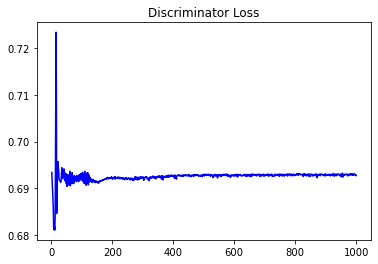

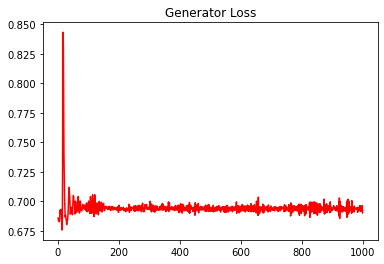

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29989962267118575


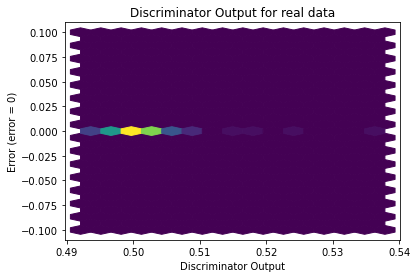

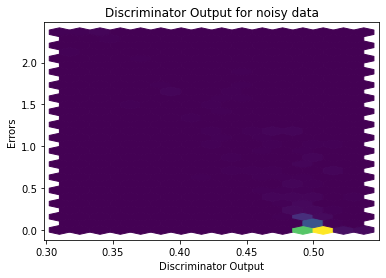

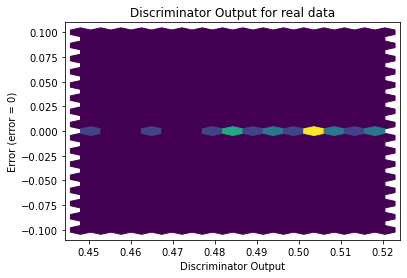

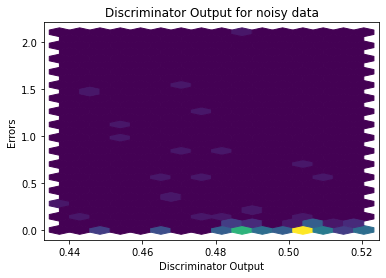

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


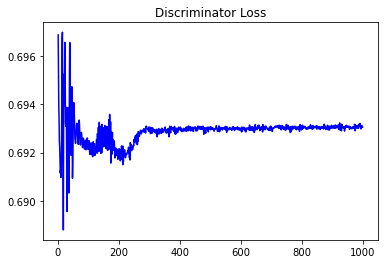

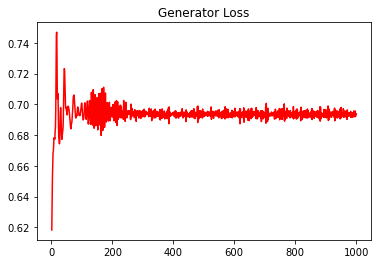

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2793926619375143


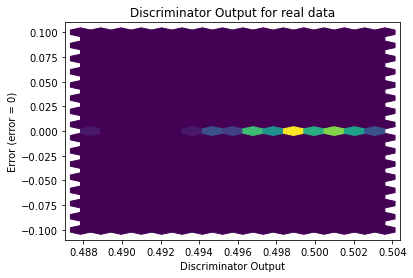

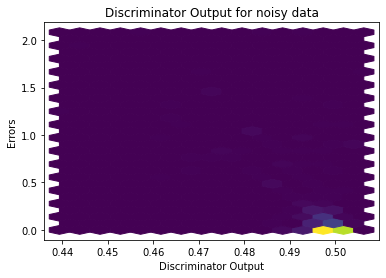

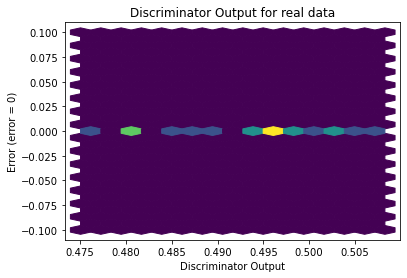

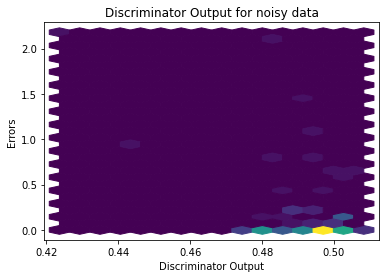

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4087]], requires_grad=True)
